# Proyecto FraudKeeper

In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Importación de los datos

In [12]:
path = "/Users/ceciliaguillametchargue/Proyecto_FraudKeeper/insurance_exercise.csv"
df = pd.read_csv(path)

### Partición del conjunto de datos

In [31]:
X = df.drop(["fraud_reported"], axis = 1)
y = df["fraud_reported"]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (850, 39) (850,)
Test set: (150, 39) (150,)


### Análisis descriptivo de los datos

In [282]:
df.head()

,days_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Observando las primeras 10 filas se puede observar que hay variables que cuentan con signos de interrogación y otras con datos faltantes.

In [283]:
df.describe()

,days_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Se puede observar que:

    - La variable _c39 no cuenta con ningún valor, por lo tanto se la puede eliminar.
    
    - El resto de las variables numéricas no tiene datos faltantes.
    
    - capital-gains muy influenciada por valores atípicos.
    
    - En el resto de las variables no se observa nada muy llamativo.

In [284]:
pd.options.display.max_columns = 0
df.describe(include = object)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,951,3,3,2,7,14,20,6,60,4,4,4,5,7,7,1000,3,3,14,39,2
top,1/1/2006,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,2/2/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,2577 Washington Drive,?,NO,Saab,RAM,N
freq,3,352,351,537,161,93,64,183,28,419,292,354,292,262,157,1,360,343,80,43,753


In [285]:
df.dtypes

days_as_customer                 int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [286]:
pd.crosstab(index = df['incident_type'],
        columns = df['collision_type'])

collision_type,?,Front Collision,Rear Collision,Side Collision
incident_type,,,,
Multi-vehicle Collision,0,115,152,152
Parked Car,84,0,0,0
Single Vehicle Collision,0,139,140,124
Vehicle Theft,94,0,0,0


Los signos ? ocurren dado que la variable collision_type no corresponde ser respondida.

In [287]:
### Eliminación de variables

df.drop(['policy_number', 'insured_zip', '_c39'], axis = 1, inplace = True)


### Vemos qué variables tienen signo de interrogración

df['collision_type'].replace('?', 'not applicable', inplace = True)
df.replace('?', np.nan, inplace = True)


### Conversión a fecha

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], format = '%m/%d/%Y')
df['incident_date'] = pd.to_datetime(df['incident_date'], format = '%m/%d/%Y')

In [288]:
pd.set_option('max_rows', None)
df.isnull().sum()

days_as_customer                 0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [289]:
### Juntando categorías 'husband' y 'wife'

df["insured_relationship"] = np.where(df["insured_relationship"] == 'husband', 'married', df["insured_relationship"])
df["insured_relationship"] = np.where(df["insured_relationship"] == 'wife', 'married', df["insured_relationship"])


### Juntando categorías de 'insured_hobbies'

df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'reading', 'intelectual', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'board-games', 'intelectual', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'chess', 'intelectual', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'video-games', 'intelectual', df["insured_hobbies"])

df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'bungie-jumping', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'base-jumping', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'golf', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'kayaking', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'polo', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'basketball', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'cross-fit', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'exercise', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'skydiving', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'hiking', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'dancing', 'sports', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'yachting', 'sports', df["insured_hobbies"])

df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'camping', 'recreational', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'movies', 'recreational', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'paintball', 'recreational', df["insured_hobbies"])
df["insured_hobbies"] = np.where(df["insured_hobbies"] == 'sleeping', 'recreational', df["insured_hobbies"])



In [290]:
df.head()

,days_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,recreational,married,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,intelectual,other-relative,0,0,2015-01-21,Vehicle Theft,not applicable,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,intelectual,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,intelectual,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,intelectual,unmarried,66000,-46000,2015-02-17,Vehicle Theft,not applicable,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [291]:
df["auto_make"].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [292]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='days_as_customer'>

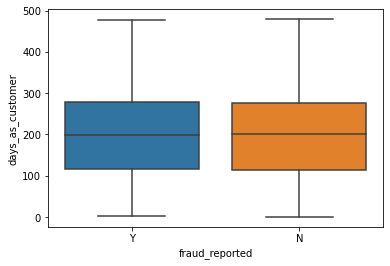

In [239]:
sns.boxplot(x = "fraud_reported", y = "days_as_customer", data = df)

<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

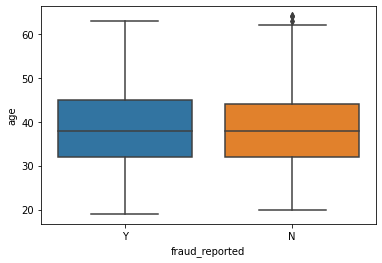

In [134]:
sns.boxplot(x = "fraud_reported", y = "age", data = df)

<AxesSubplot:xlabel='fraud_reported'>

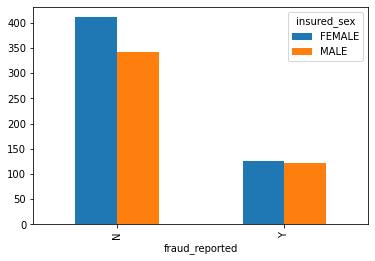

In [172]:
df_sex = pd.crosstab(index = df["fraud_reported"],
                  columns = df["insured_sex"])

df_sex.plot(kind = 'bar')

<AxesSubplot:xlabel='fraud_reported'>

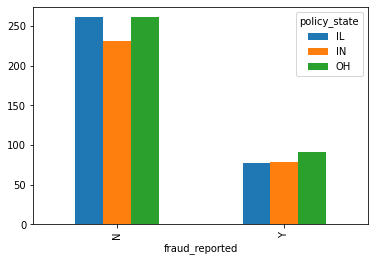

In [173]:
df_policy_state = pd.crosstab(index = df["fraud_reported"],
                  columns = df["policy_state"])

df_policy_state.plot(kind = 'bar')

<AxesSubplot:xlabel='fraud_reported'>

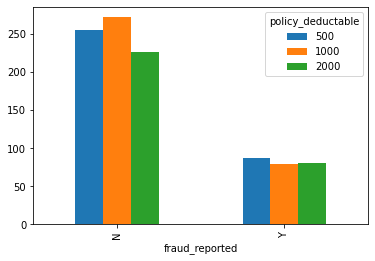

In [175]:
df_policy_deduc = pd.crosstab(index = df["fraud_reported"],
                  columns = df["policy_deductable"])

df_policy_deduc.plot(kind = 'bar')

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

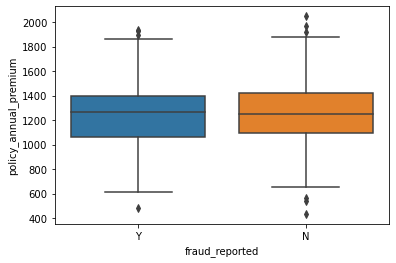

In [177]:
sns.boxplot(x = "fraud_reported", y = "policy_annual_premium", data = df)

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

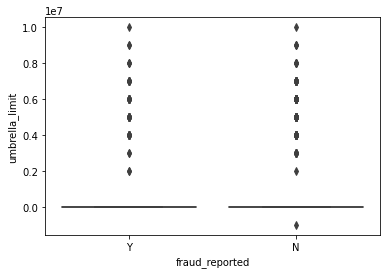

In [180]:
sns.boxplot(x = "fraud_reported", y = "umbrella_limit", data = df)

<AxesSubplot:xlabel='fraud_reported'>

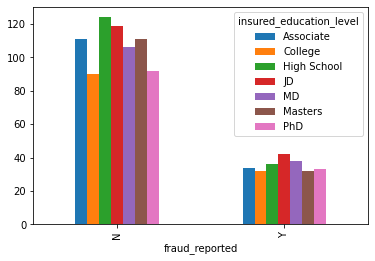

In [181]:
df_educ = pd.crosstab(index = df["fraud_reported"],
                  columns = df["insured_education_level"])

df_educ.plot(kind = 'bar')

<AxesSubplot:xlabel='fraud_reported'>

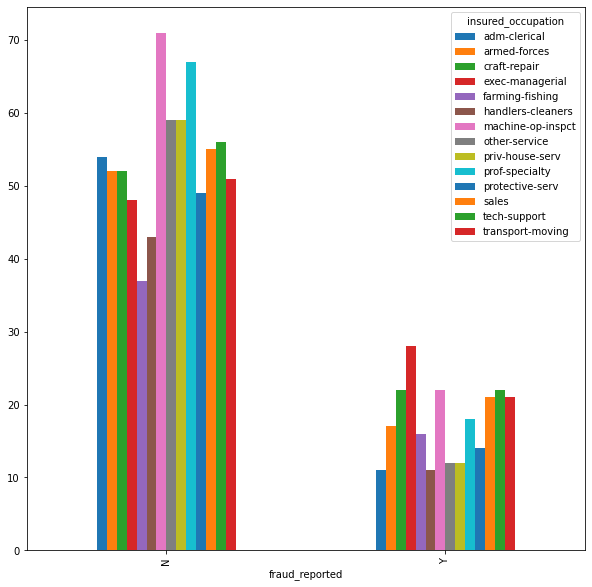

In [186]:
df_ocup = pd.crosstab(index = df["fraud_reported"],
                  columns = df["insured_occupation"])

df_ocup.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

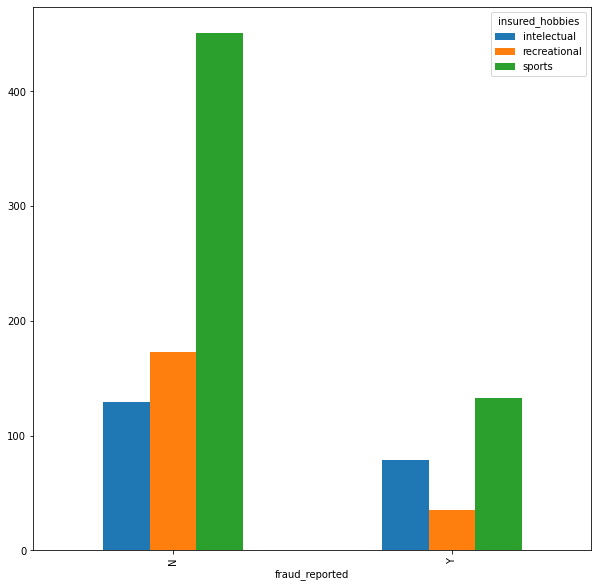

In [187]:
df_hobbies = pd.crosstab(index = df["fraud_reported"],
                  columns = df["insured_hobbies"])

df_hobbies.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

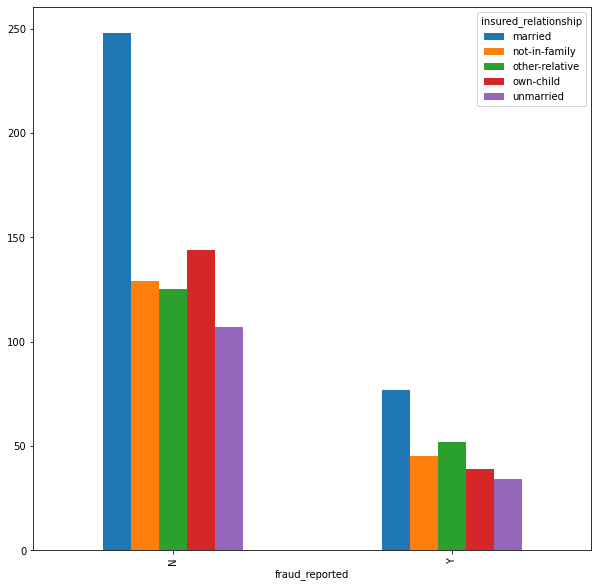

In [188]:
df_relationship = pd.crosstab(index = df["fraud_reported"],
                  columns = df["insured_relationship"])

df_relationship.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

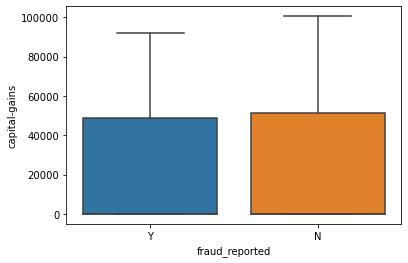

In [189]:
sns.boxplot(x = "fraud_reported", y = "capital-gains", data = df)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

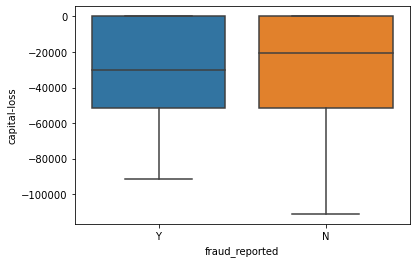

In [190]:
sns.boxplot(x = "fraud_reported", y = "capital-loss", data = df)

<AxesSubplot:xlabel='fraud_reported'>

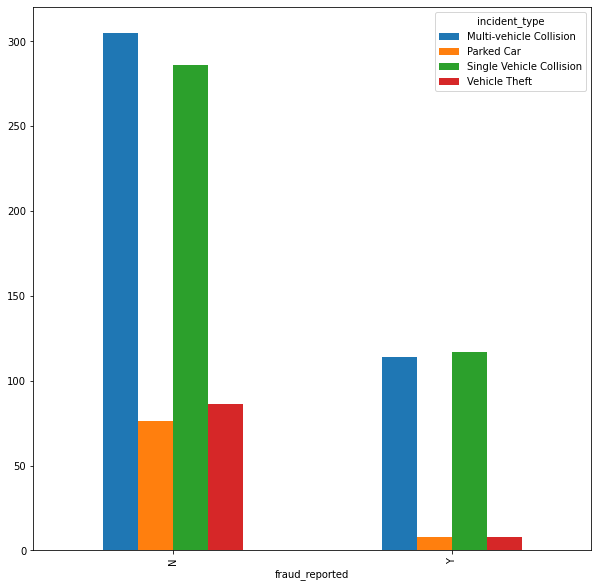

In [191]:
df_incident_type = pd.crosstab(index = df["fraud_reported"],
                  columns = df["incident_type"])

df_incident_type.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

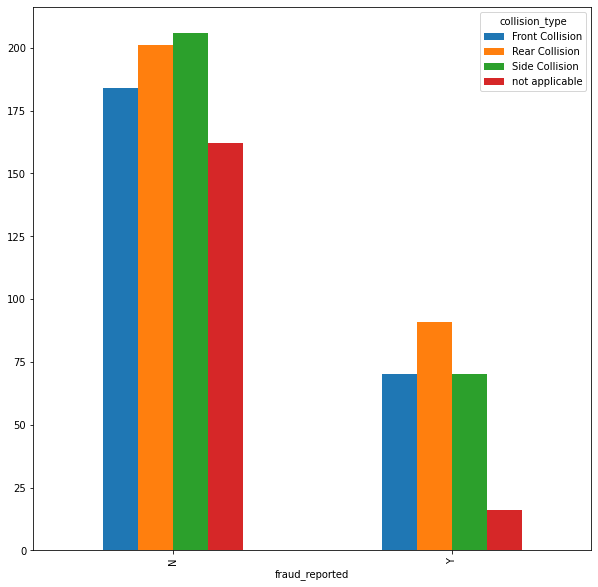

In [192]:
df_collision_type = pd.crosstab(index = df["fraud_reported"],
                  columns = df["collision_type"])

df_collision_type.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

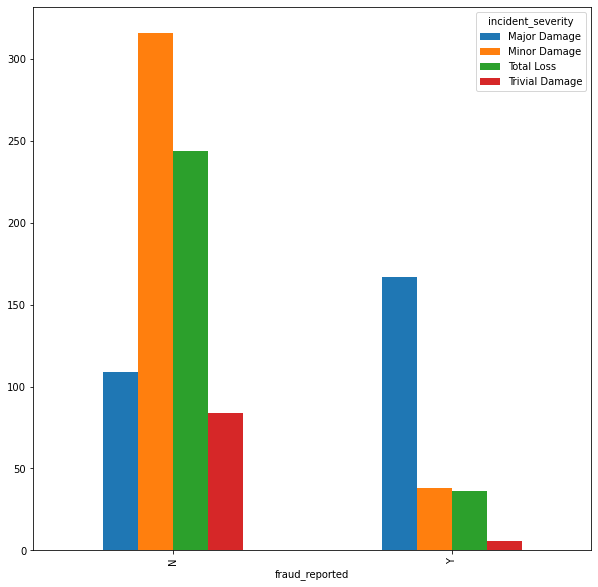

In [193]:
df_severity = pd.crosstab(index = df["fraud_reported"],
                  columns = df["incident_severity"])

df_severity.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

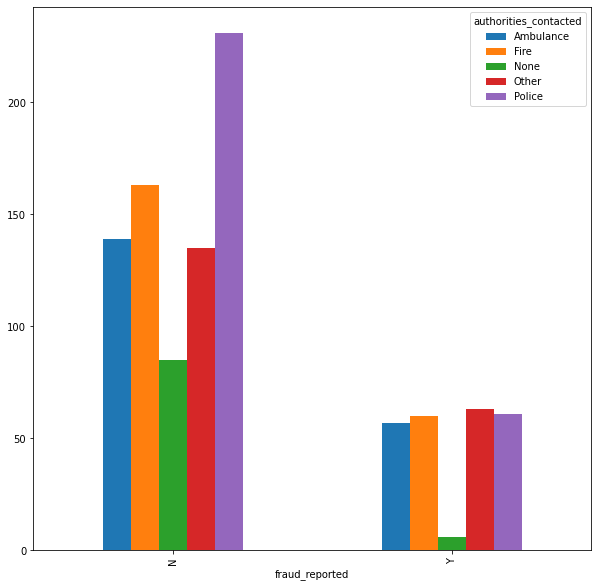

In [194]:
df_authorities = pd.crosstab(index = df["fraud_reported"],
                  columns = df["authorities_contacted"])

df_authorities.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

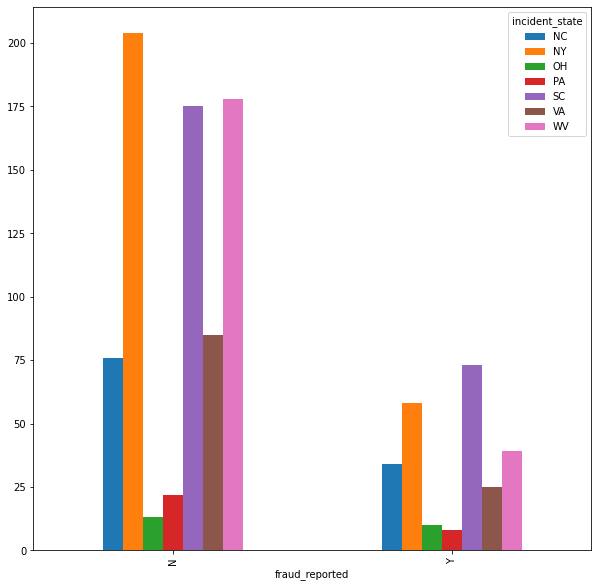

In [195]:
df_state = pd.crosstab(index = df["fraud_reported"],
                  columns = df["incident_state"])

df_state.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

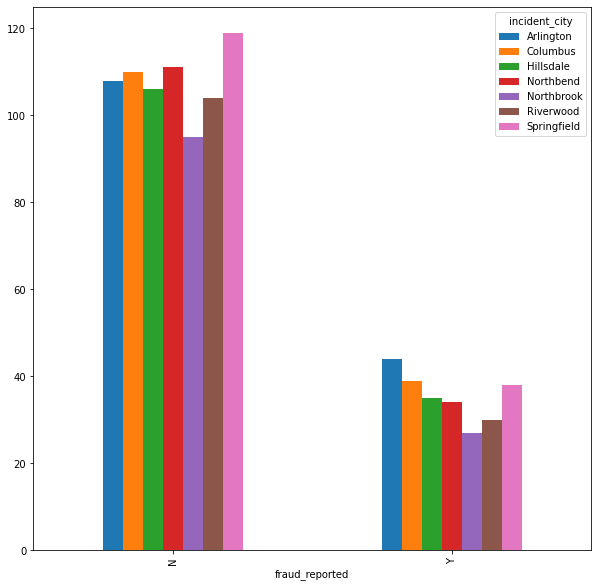

In [196]:
df_city = pd.crosstab(index = df["fraud_reported"],
                  columns = df["incident_city"])

df_city.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported', ylabel='incident_hour_of_the_day'>

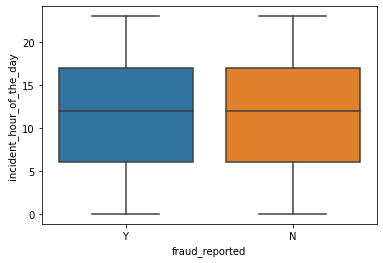

In [199]:
sns.boxplot(x = "fraud_reported", y = "incident_hour_of_the_day", data = df)

<AxesSubplot:xlabel='fraud_reported', ylabel='number_of_vehicles_involved'>

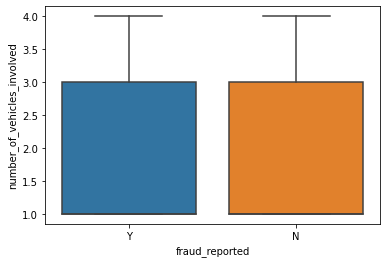

In [200]:
sns.boxplot(x = "fraud_reported", y = "number_of_vehicles_involved", data = df)

<AxesSubplot:xlabel='fraud_reported'>

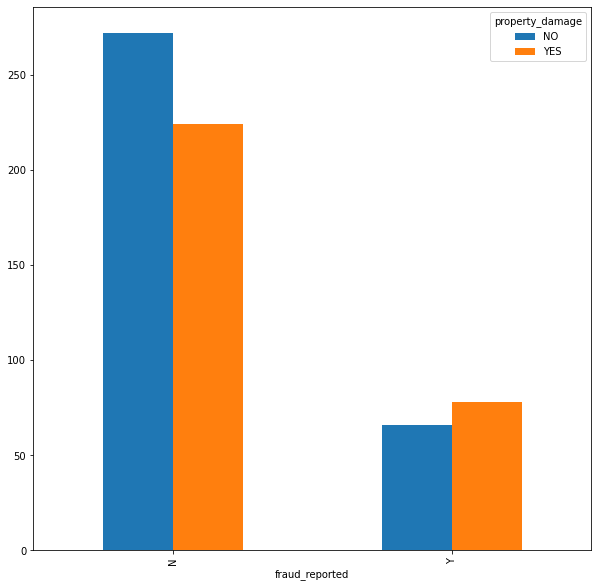

In [201]:
df_prop_damage = pd.crosstab(index = df["fraud_reported"],
                  columns = df["property_damage"])

df_prop_damage.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

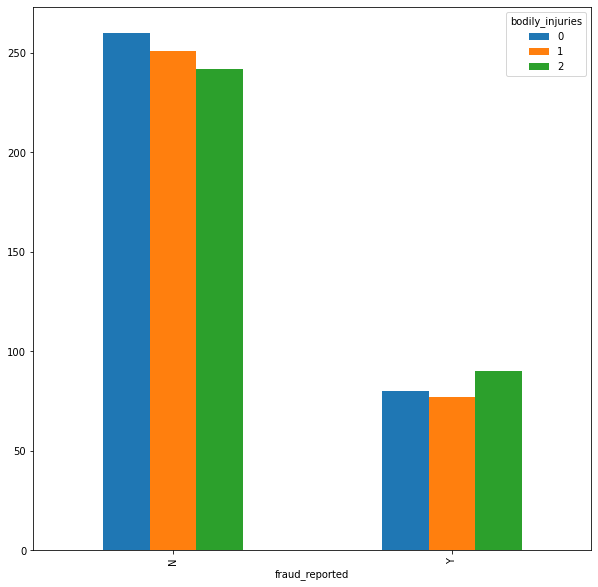

In [202]:
df_injuries = pd.crosstab(index = df["fraud_reported"],
                  columns = df["bodily_injuries"])

df_injuries.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

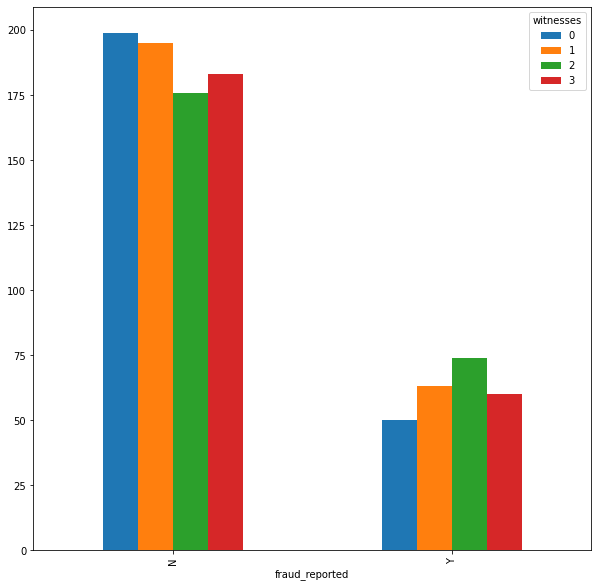

In [203]:
df_witnesses = pd.crosstab(index = df["fraud_reported"],
                  columns = df["witnesses"])

df_witnesses.plot(kind = 'bar', figsize = (10,10))


<AxesSubplot:xlabel='fraud_reported'>

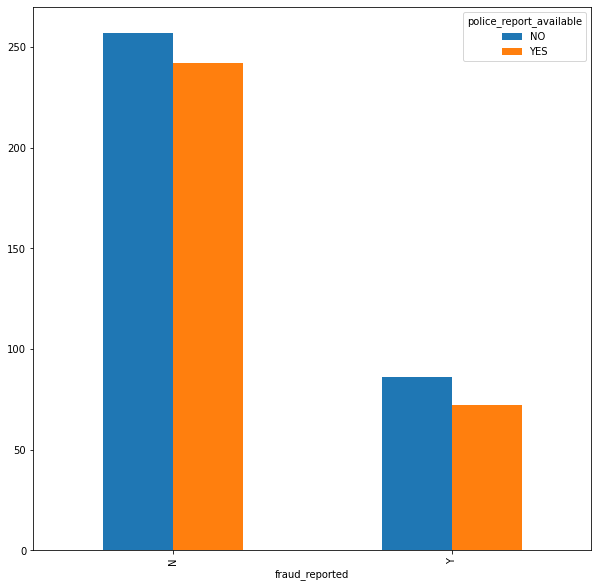

In [204]:
df_report = pd.crosstab(index = df["fraud_reported"],
                  columns = df["police_report_available"])

df_report.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

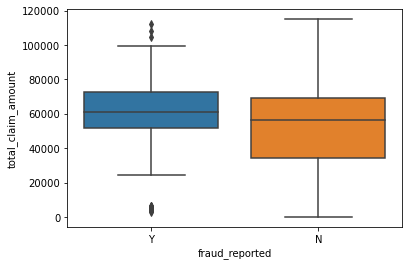

In [205]:
sns.boxplot(x = "fraud_reported", y = "total_claim_amount", data = df)

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

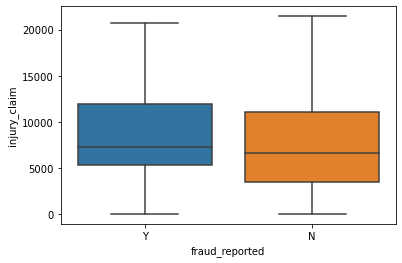

In [206]:
sns.boxplot(x = "fraud_reported", y = "injury_claim", data = df)

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

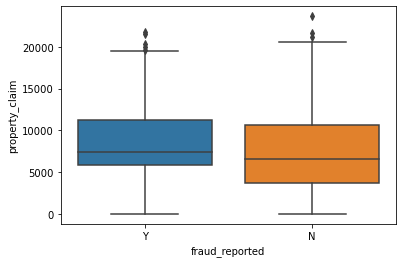

In [208]:
sns.boxplot(x = "fraud_reported", y = "property_claim", data = df)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

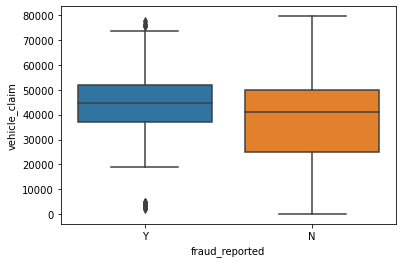

In [209]:
sns.boxplot(x = "fraud_reported", y = "vehicle_claim", data = df)

<AxesSubplot:xlabel='fraud_reported'>

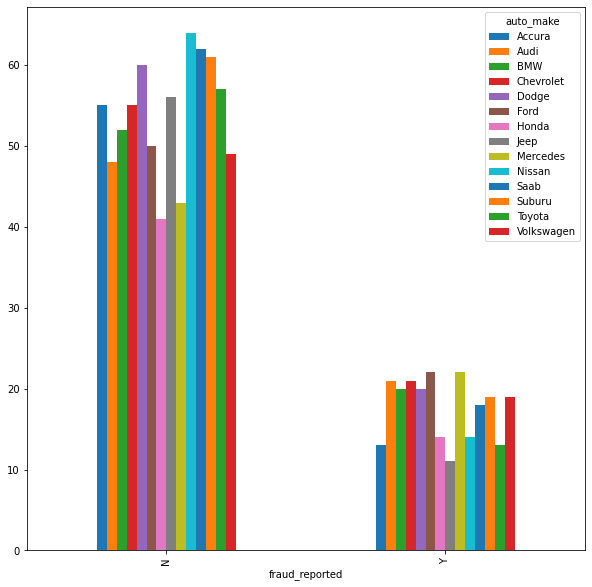

In [211]:
df_auto_make = pd.crosstab(index = df["fraud_reported"],
                  columns = df["auto_make"])

df_auto_make.plot(kind = 'bar', figsize = (10,10))

<AxesSubplot:xlabel='fraud_reported'>

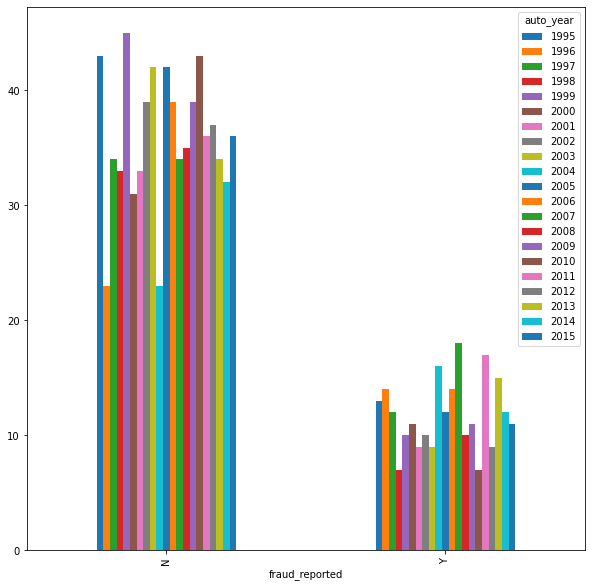

In [214]:
df_auto_year = pd.crosstab(index = df["fraud_reported"],
                  columns = df["auto_year"])

df_auto_year.plot(kind = 'bar', figsize = (10,10))

Como las variables con Nan no parecen inluir en la variable respuesta, decido no tenerlas en cuenta en el modelo.

In [293]:
df.drop(["police_report_available", "property_damage"], axis = 1, inplace = True)

### Creación de variable dummies

In [294]:
df["fraud_reported"] = np.where(df["fraud_reported"] == 'Y', 1, df["fraud_reported"])
df["fraud_reported"] = np.where(df["fraud_reported"] == 'N', 0, df["fraud_reported"])


In [302]:
df["fraud_reported"] = df["fraud_reported"].astype(int)
df.dtypes

age                        int64
insured_sex               object
policy_annual_premium    float64
umbrella_limit             int64
insured_occupation        object
insured_hobbies           object
insured_relationship      object
incident_type             object
incident_severity         object
incident_state            object
total_claim_amount         int64
property_claim             int64
vehicle_claim              int64
auto_make                 object
auto_year                  int64
fraud_reported             int64
dtype: object

In [303]:
df = df[["age", "insured_sex", "policy_annual_premium", "umbrella_limit", "insured_occupation", "insured_hobbies",
        "insured_relationship", "incident_type", "incident_severity", "incident_state", "total_claim_amount",
        "property_claim", "vehicle_claim", "auto_make", "auto_year", "fraud_reported"]]

In [304]:
df.head()

,age,insured_sex,policy_annual_premium,umbrella_limit,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,incident_state,total_claim_amount,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,48,MALE,1406.91,0,craft-repair,recreational,married,Single Vehicle Collision,Major Damage,SC,71610,13020,52080,Saab,2004,1
1,42,MALE,1197.22,5000000,machine-op-inspct,intelectual,other-relative,Vehicle Theft,Minor Damage,VA,5070,780,3510,Mercedes,2007,1
2,29,FEMALE,1413.14,5000000,sales,intelectual,own-child,Multi-vehicle Collision,Minor Damage,NY,34650,3850,23100,Dodge,2007,0
3,41,FEMALE,1415.74,6000000,armed-forces,intelectual,unmarried,Single Vehicle Collision,Major Damage,OH,63400,6340,50720,Chevrolet,2014,1
4,44,MALE,1583.91,6000000,sales,intelectual,unmarried,Vehicle Theft,Minor Damage,NY,6500,650,4550,Accura,2009,0


In [305]:
categoricas = []
for i in df.columns:
    if df[i].dtype == "object":
        categoricas.append(i)
print(categoricas)

['insured_sex', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'incident_severity', 'incident_state', 'auto_make']


In [306]:
for cat in categoricas:
    cat_list = 'cat' + "_" + cat
    cat_dummies = pd.get_dummies(df[cat], prefix = cat_list)
    df_n = df.join(cat_dummies)
    df = df_n
df.head()

,age,insured_sex,policy_annual_premium,umbrella_limit,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,incident_state,total_claim_amount,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,cat_insured_sex_FEMALE,cat_insured_sex_MALE,cat_insured_occupation_adm-clerical,cat_insured_occupation_armed-forces,cat_insured_occupation_craft-repair,cat_insured_occupation_exec-managerial,cat_insured_occupation_farming-fishing,cat_insured_occupation_handlers-cleaners,cat_insured_occupation_machine-op-inspct,cat_insured_occupation_other-service,cat_insured_occupation_priv-house-serv,cat_insured_occupation_prof-specialty,cat_insured_occupation_protective-serv,cat_insured_occupation_sales,cat_insured_occupation_tech-support,cat_insured_occupation_transport-moving,cat_insured_hobbies_intelectual,cat_insured_hobbies_recreational,cat_insured_hobbies_sports,cat_insured_relationship_married,cat_insured_relationship_not-in-family,cat_insured_relationship_other-relative,cat_insured_relationship_own-child,cat_insured_relationship_unmarried,cat_incident_type_Multi-vehicle Collision,cat_incident_type_Parked Car,cat_incident_type_Single Vehicle Collision,cat_incident_type_Vehicle Theft,cat_incident_severity_Major Damage,cat_incident_severity_Minor Damage,cat_incident_severity_Total Loss,cat_incident_severity_Trivial Damage,cat_incident_state_NC,cat_incident_state_NY,cat_incident_state_OH,cat_incident_state_PA,cat_incident_state_SC,cat_incident_state_VA,cat_incident_state_WV,cat_auto_make_Accura,cat_auto_make_Audi,cat_auto_make_BMW,cat_auto_make_Chevrolet,cat_auto_make_Dodge,cat_auto_make_Ford,cat_auto_make_Honda,cat_auto_make_Jeep,cat_auto_make_Mercedes,cat_auto_make_Nissan,cat_auto_make_Saab,cat_auto_make_Suburu,cat_auto_make_Toyota,cat_auto_make_Volkswagen
0,48,MALE,1406.91,0,craft-repair,recreational,married,Single Vehicle Collision,Major Damage,SC,71610,13020,52080,Saab,2004,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,42,MALE,1197.22,5000000,machine-op-inspct,intelectual,other-relative,Vehicle Theft,Minor Damage,VA,5070,780,3510,Mercedes,2007,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,29,FEMALE,1413.14,5000000,sales,intelectual,own-child,Multi-vehicle Collision,Minor Damage,NY,34650,3850,23100,Dodge,2007,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,41,FEMALE,1415.74,6000000,armed-forces,intelectual,unmarried,Single Vehicle Collision,Major Damage,OH,63400,6340,50720,Chevrolet,2014,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,44,MALE,1583.91,6000000,sales,intelectual,unmarried,Vehicle Theft,Minor Damage,NY,6500,650,4550,Accura,2009,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Construcción del modelo

In [307]:
X = df.drop(["fraud_reported"], axis = 1)
X.head()

,age,insured_sex,policy_annual_premium,umbrella_limit,insured_occupation,insured_hobbies,insured_relationship,incident_type,incident_severity,incident_state,total_claim_amount,property_claim,vehicle_claim,auto_make,auto_year,cat_insured_sex_FEMALE,cat_insured_sex_MALE,cat_insured_occupation_adm-clerical,cat_insured_occupation_armed-forces,cat_insured_occupation_craft-repair,cat_insured_occupation_exec-managerial,cat_insured_occupation_farming-fishing,cat_insured_occupation_handlers-cleaners,cat_insured_occupation_machine-op-inspct,cat_insured_occupation_other-service,cat_insured_occupation_priv-house-serv,cat_insured_occupation_prof-specialty,cat_insured_occupation_protective-serv,cat_insured_occupation_sales,cat_insured_occupation_tech-support,cat_insured_occupation_transport-moving,cat_insured_hobbies_intelectual,cat_insured_hobbies_recreational,cat_insured_hobbies_sports,cat_insured_relationship_married,cat_insured_relationship_not-in-family,cat_insured_relationship_other-relative,cat_insured_relationship_own-child,cat_insured_relationship_unmarried,cat_incident_type_Multi-vehicle Collision,cat_incident_type_Parked Car,cat_incident_type_Single Vehicle Collision,cat_incident_type_Vehicle Theft,cat_incident_severity_Major Damage,cat_incident_severity_Minor Damage,cat_incident_severity_Total Loss,cat_incident_severity_Trivial Damage,cat_incident_state_NC,cat_incident_state_NY,cat_incident_state_OH,cat_incident_state_PA,cat_incident_state_SC,cat_incident_state_VA,cat_incident_state_WV,cat_auto_make_Accura,cat_auto_make_Audi,cat_auto_make_BMW,cat_auto_make_Chevrolet,cat_auto_make_Dodge,cat_auto_make_Ford,cat_auto_make_Honda,cat_auto_make_Jeep,cat_auto_make_Mercedes,cat_auto_make_Nissan,cat_auto_make_Saab,cat_auto_make_Suburu,cat_auto_make_Toyota,cat_auto_make_Volkswagen
0,48,MALE,1406.91,0,craft-repair,recreational,married,Single Vehicle Collision,Major Damage,SC,71610,13020,52080,Saab,2004,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,42,MALE,1197.22,5000000,machine-op-inspct,intelectual,other-relative,Vehicle Theft,Minor Damage,VA,5070,780,3510,Mercedes,2007,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,29,FEMALE,1413.14,5000000,sales,intelectual,own-child,Multi-vehicle Collision,Minor Damage,NY,34650,3850,23100,Dodge,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,41,FEMALE,1415.74,6000000,armed-forces,intelectual,unmarried,Single Vehicle Collision,Major Damage,OH,63400,6340,50720,Chevrolet,2014,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,44,MALE,1583.91,6000000,sales,intelectual,unmarried,Vehicle Theft,Minor Damage,NY,6500,650,4550,Accura,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [308]:
Y = df["fraud_reported"]
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.15, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (850, 39) (850,)
Test set: (150, 39) (150,)


In [35]:
y_train.value_counts()

N    649
Y    201
Name: fraud_reported, dtype: int64